<a href="https://colab.research.google.com/github/toghrulbabayev/AdvancedAI/blob/main/ML_semantic_sentiment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

sentences = [
    "Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.",
    "Şirkətin gəlirləri bu rübdə 25%artmışdır.",
    "Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.",
    "Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.",
    "Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.",
    "Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.",
    "Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.",
    "Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.",
    "Dünənki iclasda heç bir yekun qərar qəbul edilmədi.",
    "Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.",
    "Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.",
    "Şahmat turnirinin qalibi on yaşlı uşaq oldu.",
    "Telefonun batareyası iki saat ərzində tam dolacaq.",
    "Qiymətlərin bahalaşması əhalinin narahatlığına səbəb olmuşdur.",
    "Bütün işçilər yeni iş metodlarına asanlıqla uyğunlaşdılar.",
    "Təmir işləri gedən yol bağlanıb və alternativ marşrutdan istifadə olunur.",
    "Əsrlərdir ki, bu köhnə qala öz sirli tarixini qoruyub saxlayır.",
    "Təhlükəsizlik kameraları ərazidə baş verən hadisələri qeydə alır.",
    "Bazar araşdırması göstərdi ki, istehlakçıların marağı kəskin azalıb.",
    "Şəhərin mərkəzi parkı tamamilə yeniləndi və çox gözəl oldu.",
    "Gecə göyü minlərlə parlaq ulduzla doludur.",
    "Məhsulun istehsalında ciddi keyfiyyət problemləri aşkarlandı.",
    "Qanunvericiliyə edilən yeni dəyişikliklər cəmiyyət tərəfindən müsbət qarşılandı.",
    "Elektrik enerjisi təchizatında yaranan fasilə işləri dayandırıb.",
    "Hər gün səhər saat 7-də işə hazır olmaq lazımdır.",
    "Komanda iki həftəlik gərgin işdən sonra layihəni vaxtından əvvəl təhvil verdi.",
    "Dəniz səviyyəsinin yüksəlməsi sahil əraziləri için böyük təhlükə yaradır.",
    "Ötən il kənd təsərrüfatı rekord məhsuldarlıq göstərdi.",
    "Hesablama maşınının təqdim etdiyi nəticələr yoxlanılmalıdır.",
    "Şəhər səs-küyü insanları yorur və stressə salır.",
    "Təhsil ocaqlarında yeni tədris proqramları tətbiq ediləcək.",
    "Bu illik tibbi yoxlamadan sonra heç bir problem tapılmadı.",
    "Su anbarında suyun səviyyəsi kritik həddə qədər düşmüşdür.",
    "Bütün lazımi məlumatlar rəqəmsal arxivdə saxlanılır.",
    "Peşəkar inkişaf kursları işçilərin karyerasına böyük təsir göstərir.",
    "Metroda texniki nasazlıq səbəbindən sərnişinlər təxliyə olundu.",
    "Günəşdən enerji toplamaq üçün yeni panellər quraşdırılır.",
    "Rəqib şirkətin uğursuzluğu bizim üçün yeni bazarlar açdı.",
    "Uşaqlar məktəbdə fiziki fəaliyyətlə məşğul olmurlar.",
    "Bütün iştirakçılar tədbirin təşkilatçılığından razı qaldılar.",
    "Qaranlıq otaqda heç nə görmək mümkün deyil.",
    "Mürəkkəb riyazi düstur dəqiq həlli təmin edir.",
    "Şöbələr arası koordinasiya əla səviyyədədir.",
    "Şəhərdəki zibillənmə problemi hələ də həllini tapmayıb.",
    "Yüksək sürətli internet əlaqəsi bütün evlərə çatdırıldı.",
    "Dərslər sentyabrın on beşindən başlayır.",
    "Yeni icad enerji istehlakını dramatik şəkildə azaldır.",
    "Xəstəxanada uzun növbələr xəstələrin şikayətlərinə səbəb olur.",
    "Kənd yolları son illərdə əhəmiyyətli dərəcədə yaxşılaşdırılmışdır.",
    "Səhmlər bazarın açılışında kiçik bir dəyişikliklə qeydə alındı.",
    "Təyyarə gözlənilməz texniki səbəblərdən gecikdi.",
    "Həftəsonu üçün planlaşdırılan bütün idman tədbirləri təxirə salındı.",
    "Layihənin əsas hədəflərinə vaxtından əvvəl nail olundu.",
    "Günəş çıxanda hava birdən-birə isindi və aydınlaşdı.",
    "Tədqiqatçı qrupu yeni bir kimyəvi element kəşf etdi.",
    "Mədəni irsin qorunması üçün yeni fond yaradılmışdır.",
    "Bu il baş verən güclü quraqlıq kəndlilərə ziyan vurdu.",
    "Qeyri-qanuni tikintilər söküldü və şəhərin görkəmi yaxşılaşdı.",
    "Yeni mütəxəssis işə qəbul edildi və komandaya qoşuldu.",
    "Təhlükəli tullantıların zərərsizləşdirilməsi prosesi təxirə salındı.",
    "Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır.",
    "Kitabın hər səhifəsi dəqiq faktiki məlumatlarla zəngindir.",
    "Yaşayış binasındakı yanğın qısa müddətdə söndürüldü.",
    "İnsan orqanizminin bir çox ehtiyacı təmiz sudan asılıdır.",
    "Bütün avadanlıqlar yeniləndi və sınaqdan uğurla keçdi.",
    "Nəzarət-buraxılış məntəqəsində uzun tıxac əmələ gəlib.",
    "Qədim abidənin təmizlənməsi onun əsl gözəlliyini ortaya çıxardı.",
    "Müəssisənin bütün əsas borcları tamamilə ödənildi.",
    "Məhsulun qiyməti gözlənilmədən yox, planlı şəkildə düşdü.",
    "Hər on ildən bir əhalinin siyahıya alınması aparılır.",
    "Xaricdən gətirilən malların keyfiyyətində ciddi problemlər var idi.",
    "Planetimizin biosferi mürəkkəb və həssas bir sistemdir.",
    "Qış mövsümündə istilik sistemi qənaətlə işləyir.",
    "Təcrübədə gözlənilən nəticə əldə olunmadı və yenidən başlanılacaq.",
    "Müqavilənin şərtləri tərəflərin hər ikisini qane etdi.",
    "Xəstəxanadakı avadanlıqlar köhnədir və dəyişdirilməlidir.",
    "Bütün sənədlər qanuni tələblərə uyğun şəkildə hazırlanmışdır.",
    "Ölkədəki turizm sektoru rekord gəlirlər əldə etdi.",
    "Təcili yardım maşınları yolda tıxacda qalmışdı.",
    "Yeni proqram təminatı şirkətin iş sürətini üç dəfə artırdı.",
    "Meteoroloji stansiya küləyin sürətini dəqiq ölçür.",
    "Xarici investorlar ölkə iqtisadiyyatına böyük maraq göstərir.",
    "Yaşlı sakinlər üçün nəqliyyat xərcləri endirildi.",
    "Məlumatların oğurlanması şirkətin böyük maliyyə itkilərinə səbəb oldu.",
    "Qədim əlyazmanın yaşı karbon analizi ilə müəyyən edildi.",
    "Tikinti sahəsində təhlükəsizlik qaydaları pozulurdu.",
    "Bərpa olunan enerji mənbələrinə keçid sürətlənir.",
    "Bəzi tələbələr imtahanlara hazırlıqsız gəlmişdilər.",
    "Şəhər əhalisinin orta yaş həddi hesabatda göstərilmişdir.",
    "Milli komanda beynəlxalq yarışda yüksək nəticə göstərdi.",
    "Şirkətin sərəncamında beş yeni yük maşını var.",
    "İşçilərə verilən yüksək maaşlar onların motivasiyasını artırır.",
    "Dərman qıtlığı ucbatından xəstələrin vəziyyəti ağırlaşdı.",
    "Zəlzələyə davamlı binaların tikintisi sürətləndirildi.",
    "Elmi konfransda qeyri-adi bir nəzəriyyə irəli sürüldü.",
    "Qədim şəhərin xarabalıqları arasında yeni sirlər gizlənir.",
    "Hökumət pensiyaların məbləğini əhəmiyyətli dərəcədə artırdı.",
    "Dənizdə baş verən neft sızıntısı böyük bir ekoloji fəlakətdir.",
    "Rəhbərlik işçilərə əlavə bir günlük istirahət verdi.",
    "Qəza baş vermiş yol hissəsində hərəkət tamamilə bərpa olundu."
]

embeddings = model.encode(sentences, convert_to_tensor=True)

print("Dataset hazırdır, embedding-lər generasiya olundu.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Dataset hazırdır, embedding-lər generasiya olundu.


In [3]:
query = "Şirkətin gəlirlərinin artması ilə bağlı cümlə"
query_emb = model.encode(query, convert_to_tensor=True)

print("Sorğu embedding-i hazırdır.")


Sorğu embedding-i hazırdır.


In [4]:

scores = util.cos_sim(query_emb, embeddings)[0]


for idx, score in enumerate(scores):
    print(f"{idx}. {sentences[idx]}  ---> Oxşarlıq: {score:.4f}")


0. Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.  ---> Oxşarlıq: 0.0212
1. Şirkətin gəlirləri bu rübdə 25%artmışdır.  ---> Oxşarlıq: 0.5789
2. Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.  ---> Oxşarlıq: 0.4012
3. Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.  ---> Oxşarlıq: 0.2332
4. Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.  ---> Oxşarlıq: 0.1371
5. Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.  ---> Oxşarlıq: 0.2697
6. Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.  ---> Oxşarlıq: 0.2666
7. Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.  ---> Oxşarlıq: -0.0085
8. Dünənki iclasda heç bir yekun qərar qəbul edilmədi.  ---> Oxşarlıq: 0.0624
9. Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.  ---> Oxşarlıq: 0.2427
10. Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.  ---> Oxşarlıq: 0.3147
11. Şahmat turnirinin qalibi on yaşlı uşaq oldu.  ---> Oxşarlıq: 0.021

In [5]:
import torch


best_idx = torch.argmax(scores).item()

print("\n📌 Ən uyğun cümlə:")
print(sentences[best_idx])
print(f"Oxşarlıq dərəcəsi: {scores[best_idx]:.4f}")



📌 Ən uyğun cümlə:
Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır.
Oxşarlıq dərəcəsi: 0.6453


In [6]:

sorted_results = torch.argsort(scores, descending=True)

print("📌 Ən uyğun 3 nəticə:")
for idx in sorted_results[:3]:
    print(f"- {sentences[idx]} (oxşarlıq: {scores[idx]:.4f})")


📌 Ən uyğun 3 nəticə:
- Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır. (oxşarlıq: 0.6453)
- İşçilərə verilən yüksək maaşlar onların motivasiyasını artırır. (oxşarlıq: 0.5814)
- Şirkətin gəlirləri bu rübdə 25%artmışdır. (oxşarlıq: 0.5789)


In [ ]:
#Sentiment

In [ ]:
#Sentiment

In [ ]:
#Sentiment

In [7]:
!pip install transformers sentencepiece
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

print("Model yükləndi.")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Model yükləndi.


In [9]:
import numpy as np

labels = {
    0: "Çox mənfi ",
    1: "Mənfi ",
    2: "Neytral ",
    3: "Müsbət ",
    4: "Çox müsbət"
}

def sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probabilities = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    label_id = np.argmax(probabilities)
    return labels[label_id], float(probabilities[label_id])


In [ ]:
text = "Bu gün dərs çox maraqlı keçdi, özümü əla hiss edirəm!"
result, prob = sentiment(text)

print(f"Mətn: {text}")
print(f"Sentiment: {result} (ehtimal: {prob:.4f})")


In [10]:
sentences = [
    "Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.",
    "Şirkətin gəlirləri bu rübdə 25%artmışdır.",
    "Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.",
    "Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.",
    "Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.",
    "Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.",
    "Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.",
    "Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.",
    "Dünənki iclasda heç bir yekun qərar qəbul edilmədi.",
    "Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.",
    "Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.",
    "Şahmat turnirinin qalibi on yaşlı uşaq oldu.",
    "Telefonun batareyası iki saat ərzində tam dolacaq.",
    "Qiymətlərin bahalaşması əhalinin narahatlığına səbəb olmuşdur.",
    "Bütün işçilər yeni iş metodlarına asanlıqla uyğunlaşdılar.",
    "Təmir işləri gedən yol bağlanıb və alternativ marşrutdan istifadə olunur.",
    "Əsrlərdir ki, bu köhnə qala öz sirli tarixini qoruyub saxlayır.",
    "Təhlükəsizlik kameraları ərazidə baş verən hadisələri qeydə alır.",
    "Bazar araşdırması göstərdi ki, istehlakçıların marağı kəskin azalıb.",
    "Şəhərin mərkəzi parkı tamamilə yeniləndi və çox gözəl oldu.",
    "Gecə göyü minlərlə parlaq ulduzla doludur.",
    "Məhsulun istehsalında ciddi keyfiyyət problemləri aşkarlandı.",
    "Qanunvericiliyə edilən yeni dəyişikliklər cəmiyyət tərəfindən müsbət qarşılandı.",
    "Elektrik enerjisi təchizatında yaranan fasilə işləri dayandırıb.",
    "Hər gün səhər saat 7-də işə hazır olmaq lazımdır.",
    "Komanda iki həftəlik gərgin işdən sonra layihəni vaxtından əvvəl təhvil verdi.",
    "Dəniz səviyyəsinin yüksəlməsi sahil əraziləri için böyük təhlükə yaradır.",
    "Ötən il kənd təsərrüfatı rekord məhsuldarlıq göstərdi.",
    "Hesablama maşınının təqdim etdiyi nəticələr yoxlanılmalıdır.",
    "Şəhər səs-küyü insanları yorur və stressə salır.",
    "Təhsil ocaqlarında yeni tədris proqramları tətbiq ediləcək.",
    "Bu illik tibbi yoxlamadan sonra heç bir problem tapılmadı.",
    "Su anbarında suyun səviyyəsi kritik həddə qədər düşmüşdür.",
    "Bütün lazımi məlumatlar rəqəmsal arxivdə saxlanılır.",
    "Peşəkar inkişaf kursları işçilərin karyerasına böyük təsir göstərir.",
    "Metroda texniki nasazlıq səbəbindən sərnişinlər təxliyə olundu.",
    "Günəşdən enerji toplamaq üçün yeni panellər quraşdırılır.",
    "Rəqib şirkətin uğursuzluğu bizim üçün yeni bazarlar açdı.",
    "Uşaqlar məktəbdə fiziki fəaliyyətlə məşğul olmurlar.",
    "Bütün iştirakçılar tədbirin təşkilatçılığından razı qaldılar.",
    "Qaranlıq otaqda heç nə görmək mümkün deyil.",
    "Mürəkkəb riyazi düstur dəqiq həlli təmin edir.",
    "Şöbələr arası koordinasiya əla səviyyədədir.",
    "Şəhərdəki zibillənmə problemi hələ də həllini tapmayıb.",
    "Yüksək sürətli internet əlaqəsi bütün evlərə çatdırıldı.",
    "Dərslər sentyabrın on beşindən başlayır.",
    "Yeni icad enerji istehlakını dramatik şəkildə azaldır.",
    "Xəstəxanada uzun növbələr xəstələrin şikayətlərinə səbəb olur.",
    "Kənd yolları son illərdə əhəmiyyətli dərəcədə yaxşılaşdırılmışdır.",
    "Səhmlər bazarın açılışında kiçik bir dəyişikliklə qeydə alındı.",
    "Təyyarə gözlənilməz texniki səbəblərdən gecikdi.",
    "Həftəsonu üçün planlaşdırılan bütün idman tədbirləri təxirə salındı.",
    "Layihənin əsas hədəflərinə vaxtından əvvəl nail olundu.",
    "Günəş çıxanda hava birdən-birə isindi və aydınlaşdı.",
    "Tədqiqatçı qrupu yeni bir kimyəvi element kəşf etdi.",
    "Mədəni irsin qorunması üçün yeni fond yaradılmışdır.",
    "Bu il baş verən güclü quraqlıq kəndlilərə ziyan vurdu.",
    "Qeyri-qanuni tikintilər söküldü və şəhərin görkəmi yaxşılaşdı.",
    "Yeni mütəxəssis işə qəbul edildi və komandaya qoşuldu.",
    "Təhlükəli tullantıların zərərsizləşdirilməsi prosesi təxirə salındı.",
    "Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır.",
    "Kitabın hər səhifəsi dəqiq faktiki məlumatlarla zəngindir.",
    "Yaşayış binasındakı yanğın qısa müddətdə söndürüldü.",
    "İnsan orqanizminin bir çox ehtiyacı təmiz sudan asılıdır.",
    "Bütün avadanlıqlar yeniləndi və sınaqdan uğurla keçdi.",
    "Nəzarət-buraxılış məntəqəsində uzun tıxac əmələ gəlib.",
    "Qədim abidənin təmizlənməsi onun əsl gözəlliyini ortaya çıxardı.",
    "Müəssisənin bütün əsas borcları tamamilə ödənildi.",
    "Məhsulun qiyməti gözlənilmədən yox, planlı şəkildə düşdü.",
    "Hər on ildən bir əhalinin siyahıya alınması aparılır.",
    "Xaricdən gətirilən malların keyfiyyətində ciddi problemlər var idi.",
    "Planetimizin biosferi mürəkkəb və həssas bir sistemdir.",
    "Qış mövsümündə istilik sistemi qənaətlə işləyir.",
    "Təcrübədə gözlənilən nəticə əldə olunmadı və yenidən başlanılacaq.",
    "Müqavilənin şərtləri tərəflərin hər ikisini qane etdi.",
    "Xəstəxanadakı avadanlıqlar köhnədir və dəyişdirilməlidir.",
    "Bütün sənədlər qanuni tələblərə uyğun şəkildə hazırlanmışdır.",
    "Ölkədəki turizm sektoru rekord gəlirlər əldə etdi.",
    "Təcili yardım maşınları yolda tıxacda qalmışdı.",
    "Yeni proqram təminatı şirkətin iş sürətini üç dəfə artırdı.",
    "Meteoroloji stansiya küləyin sürətini dəqiq ölçür.",
    "Xarici investorlar ölkə iqtisadiyyatına böyük maraq göstərir.",
    "Yaşlı sakinlər üçün nəqliyyat xərcləri endirildi.",
    "Məlumatların oğurlanması şirkətin böyük maliyyə itkilərinə səbəb oldu.",
    "Qədim əlyazmanın yaşı karbon analizi ilə müəyyən edildi.",
    "Tikinti sahəsində təhlükəsizlik qaydaları pozulurdu.",
    "Bərpa olunan enerji mənbələrinə keçid sürətlənir.",
    "Bəzi tələbələr imtahanlara hazırlıqsız gəlmişdilər.",
    "Şəhər əhalisinin orta yaş həddi hesabatda göstərilmişdir.",
    "Milli komanda beynəlxalq yarışda yüksək nəticə göstərdi.",
    "Şirkətin sərəncamında beş yeni yük maşını var.",
    "İşçilərə verilən yüksək maaşlar onların motivasiyasını artırır.",
    "Dərman qıtlığı ucbatından xəstələrin vəziyyəti ağırlaşdı.",
    "Zəlzələyə davamlı binaların tikintisi sürətləndirildi.",
    "Elmi konfransda qeyri-adi bir nəzəriyyə irəli sürüldü.",
    "Qədim şəhərin xarabalıqları arasında yeni sirlər gizlənir.",
    "Hökumət pensiyaların məbləğini əhəmiyyətli dərəcədə artırdı.",
    "Dənizdə baş verən neft sızıntısı böyük bir ekoloji fəlakətdir.",
    "Rəhbərlik işçilərə əlavə bir günlük istirahət verdi.",
    "Qəza baş vermiş yol hissəsində hərəkət tamamilə bərpa olundu."
]

for s in sentences:
    label, prob = sentiment(s)
    print(f"{s} ---> {label} (ehtimal: {prob:.4f})")


Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq. ---> Neytral  (ehtimal: 0.3008)
Şirkətin gəlirləri bu rübdə 25%artmışdır. ---> Çox mənfi  (ehtimal: 0.3767)
Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir. ---> Çox müsbət (ehtimal: 0.5306)
Kitabxananın bərpası işləri böyük bir uğurla başa çatdı. ---> Çox müsbət (ehtimal: 0.4895)
Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı. ---> Mənfi  (ehtimal: 0.3699)
Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi. ---> Çox müsbət (ehtimal: 0.3720)
Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər. ---> Müsbət  (ehtimal: 0.3830)
Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı. ---> Neytral  (ehtimal: 0.2364)
Dünənki iclasda heç bir yekun qərar qəbul edilmədi. ---> Çox mənfi  (ehtimal: 0.4715)
Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu. ---> Çox müsbət (ehtimal: 0.3372)
Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır. ---> Mənfi  (ehtimal: 0.4657)

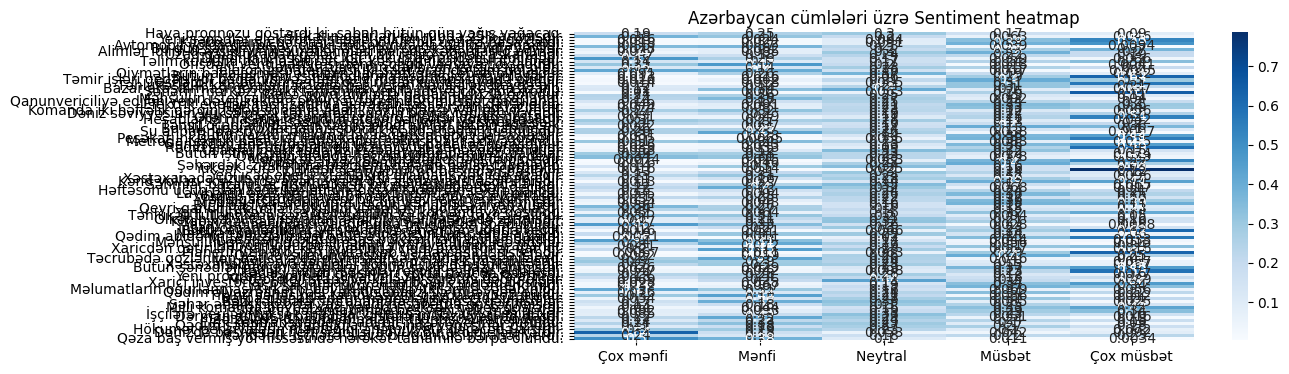

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

probs = []
for s in sentences:
    inputs = tokenizer(s, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    p = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    probs.append(p)

plt.figure(figsize=(10,4))
sns.heatmap(probs, annot=True, cmap="Blues",
            yticklabels=sentences,
            xticklabels=list(labels.values()))
plt.title("Azərbaycan cümlələri üzrə Sentiment heatmap")
plt.show()


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
def sentiment_grouped(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()


    stars = np.argmax(probs) + 1

    if stars in [1, 2]:
        label = "Mənfi"
    elif stars == 3:
        label = "Neytral"
    else:
        label = "Müsbət"

    return stars, label, probs
sentences = [
    "Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.",
    "Şirkətin gəlirləri bu rübdə 25%artmışdır.",
    "Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.",
    "Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.",
    "Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.",
    "Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.",
    "Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.",
    "Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.",
    "Dünənki iclasda heç bir yekun qərar qəbul edilmədi.",
    "Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.",
    "Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.",
    "Şahmat turnirinin qalibi on yaşlı uşaq oldu.",
    "Telefonun batareyası iki saat ərzində tam dolacaq.",
    "Qiymətlərin bahalaşması əhalinin narahatlığına səbəb olmuşdur.",
    "Bütün işçilər yeni iş metodlarına asanlıqla uyğunlaşdılar.",
    "Təmir işləri gedən yol bağlanıb və alternativ marşrutdan istifadə olunur.",
    "Əsrlərdir ki, bu köhnə qala öz sirli tarixini qoruyub saxlayır.",
    "Təhlükəsizlik kameraları ərazidə baş verən hadisələri qeydə alır.",
    "Bazar araşdırması göstərdi ki, istehlakçıların marağı kəskin azalıb.",
    "Şəhərin mərkəzi parkı tamamilə yeniləndi və çox gözəl oldu.",
    "Gecə göyü minlərlə parlaq ulduzla doludur.",
    "Məhsulun istehsalında ciddi keyfiyyət problemləri aşkarlandı.",
    "Qanunvericiliyə edilən yeni dəyişikliklər cəmiyyət tərəfindən müsbət qarşılandı.",
    "Elektrik enerjisi təchizatında yaranan fasilə işləri dayandırıb.",
    "Hər gün səhər saat 7-də işə hazır olmaq lazımdır.",
    "Komanda iki həftəlik gərgin işdən sonra layihəni vaxtından əvvəl təhvil verdi.",
    "Dəniz səviyyəsinin yüksəlməsi sahil əraziləri için böyük təhlükə yaradır.",
    "Ötən il kənd təsərrüfatı rekord məhsuldarlıq göstərdi.",
    "Hesablama maşınının təqdim etdiyi nəticələr yoxlanılmalıdır.",
    "Şəhər səs-küyü insanları yorur və stressə salır.",
    "Təhsil ocaqlarında yeni tədris proqramları tətbiq ediləcək.",
    "Bu illik tibbi yoxlamadan sonra heç bir problem tapılmadı.",
    "Su anbarında suyun səviyyəsi kritik həddə qədər düşmüşdür.",
    "Bütün lazımi məlumatlar rəqəmsal arxivdə saxlanılır.",
    "Peşəkar inkişaf kursları işçilərin karyerasına böyük təsir göstərir.",
    "Metroda texniki nasazlıq səbəbindən sərnişinlər təxliyə olundu.",
    "Günəşdən enerji toplamaq üçün yeni panellər quraşdırılır.",
    "Rəqib şirkətin uğursuzluğu bizim üçün yeni bazarlar açdı.",
    "Uşaqlar məktəbdə fiziki fəaliyyətlə məşğul olmurlar.",
    "Bütün iştirakçılar tədbirin təşkilatçılığından razı qaldılar.",
    "Qaranlıq otaqda heç nə görmək mümkün deyil.",
    "Mürəkkəb riyazi düstur dəqiq həlli təmin edir.",
    "Şöbələr arası koordinasiya əla səviyyədədir.",
    "Şəhərdəki zibillənmə problemi hələ də həllini tapmayıb.",
    "Yüksək sürətli internet əlaqəsi bütün evlərə çatdırıldı.",
    "Dərslər sentyabrın on beşindən başlayır.",
    "Yeni icad enerji istehlakını dramatik şəkildə azaldır.",
    "Xəstəxanada uzun növbələr xəstələrin şikayətlərinə səbəb olur.",
    "Kənd yolları son illərdə əhəmiyyətli dərəcədə yaxşılaşdırılmışdır.",
    "Səhmlər bazarın açılışında kiçik bir dəyişikliklə qeydə alındı.",
    "Təyyarə gözlənilməz texniki səbəblərdən gecikdi.",
    "Həftəsonu üçün planlaşdırılan bütün idman tədbirləri təxirə salındı.",
    "Layihənin əsas hədəflərinə vaxtından əvvəl nail olundu.",
    "Günəş çıxanda hava birdən-birə isindi və aydınlaşdı.",
    "Tədqiqatçı qrupu yeni bir kimyəvi element kəşf etdi.",
    "Mədəni irsin qorunması üçün yeni fond yaradılmışdır.",
    "Bu il baş verən güclü quraqlıq kəndlilərə ziyan vurdu.",
    "Qeyri-qanuni tikintilər söküldü və şəhərin görkəmi yaxşılaşdı.",
    "Yeni mütəxəssis işə qəbul edildi və komandaya qoşuldu.",
    "Təhlükəli tullantıların zərərsizləşdirilməsi prosesi təxirə salındı.",
    "Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır.",
    "Kitabın hər səhifəsi dəqiq faktiki məlumatlarla zəngindir.",
    "Yaşayış binasındakı yanğın qısa müddətdə söndürüldü.",
    "İnsan orqanizminin bir çox ehtiyacı təmiz sudan asılıdır.",
    "Bütün avadanlıqlar yeniləndi və sınaqdan uğurla keçdi.",
    "Nəzarət-buraxılış məntəqəsində uzun tıxac əmələ gəlib.",
    "Qədim abidənin təmizlənməsi onun əsl gözəlliyini ortaya çıxardı.",
    "Müəssisənin bütün əsas borcları tamamilə ödənildi.",
    "Məhsulun qiyməti gözlənilmədən yox, planlı şəkildə düşdü.",
    "Hər on ildən bir əhalinin siyahıya alınması aparılır.",
    "Xaricdən gətirilən malların keyfiyyətində ciddi problemlər var idi.",
    "Planetimizin biosferi mürəkkəb və həssas bir sistemdir.",
    "Qış mövsümündə istilik sistemi qənaətlə işləyir.",
    "Təcrübədə gözlənilən nəticə əldə olunmadı və yenidən başlanılacaq.",
    "Müqavilənin şərtləri tərəflərin hər ikisini qane etdi.",
    "Xəstəxanadakı avadanlıqlar köhnədir və dəyişdirilməlidir.",
    "Bütün sənədlər qanuni tələblərə uyğun şəkildə hazırlanmışdır.",
    "Ölkədəki turizm sektoru rekord gəlirlər əldə etdi.",
    "Təcili yardım maşınları yolda tıxacda qalmışdı.",
    "Yeni proqram təminatı şirkətin iş sürətini üç dəfə artırdı.",
    "Meteoroloji stansiya küləyin sürətini dəqiq ölçür.",
    "Xarici investorlar ölkə iqtisadiyyatına böyük maraq göstərir.",
    "Yaşlı sakinlər üçün nəqliyyat xərcləri endirildi.",
    "Məlumatların oğurlanması şirkətin böyük maliyyə itkilərinə səbəb oldu.",
    "Qədim əlyazmanın yaşı karbon analizi ilə müəyyən edildi.",
    "Tikinti sahəsində təhlükəsizlik qaydaları pozulurdu.",
    "Bərpa olunan enerji mənbələrinə keçid sürətlənir.",
    "Bəzi tələbələr imtahanlara hazırlıqsız gəlmişdilər.",
    "Şəhər əhalisinin orta yaş həddi hesabatda göstərilmişdir.",
    "Milli komanda beynəlxalq yarışda yüksək nəticə göstərdi.",
    "Şirkətin sərəncamında beş yeni yük maşını var.",
    "İşçilərə verilən yüksək maaşlar onların motivasiyasını artırır.",
    "Dərman qıtlığı ucbatından xəstələrin vəziyyəti ağırlaşdı.",
    "Zəlzələyə davamlı binaların tikintisi sürətləndirildi.",
    "Elmi konfransda qeyri-adi bir nəzəriyyə irəli sürüldü.",
    "Qədim şəhərin xarabalıqları arasında yeni sirlər gizlənir.",
    "Hökumət pensiyaların məbləğini əhəmiyyətli dərəcədə artırdı.",
    "Dənizdə baş verən neft sızıntısı böyük bir ekoloji fəlakətdir.",
    "Rəhbərlik işçilərə əlavə bir günlük istirahət verdi.",
    "Qəza baş vermiş yol hissəsində hərəkət tamamilə bərpa olundu."
]

for s in sentences:
    stars, label, probs = sentiment_grouped(s)
    print(f"{s}  →  {label} ({stars}★)")


Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.  →  Neytral (3★)
Şirkətin gəlirləri bu rübdə 25%artmışdır.  →  Mənfi (1★)
Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.  →  Müsbət (5★)
Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.  →  Müsbət (5★)
Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.  →  Mənfi (2★)
Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.  →  Müsbət (5★)
Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.  →  Müsbət (4★)
Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.  →  Neytral (3★)
Dünənki iclasda heç bir yekun qərar qəbul edilmədi.  →  Mənfi (1★)
Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.  →  Müsbət (5★)
Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.  →  Mənfi (2★)
Şahmat turnirinin qalibi on yaşlı uşaq oldu.  →  Neytral (3★)
Telefonun batareyası iki saat ərzində tam dolacaq.  →  Mənfi (1★)
Qiymətlərin bahalaşması əhalinin narahatlığına səbəb olm

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
labels = ["Mənfi", "Neytral", "Müsbət"]

def sentiment_xlm(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0].detach().numpy()
    label_id = np.argmax(probs)
    return labels[label_id], probs[label_id], probs
sentences = [
    "Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.",
    "Şirkətin gəlirləri bu rübdə 25%artmışdır.",
    "Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.",
    "Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.",
    "Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.",
    "Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.",
    "Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.",
    "Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.",
    "Dünənki iclasda heç bir yekun qərar qəbul edilmədi.",
    "Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.",
    "Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.",
    "Şahmat turnirinin qalibi on yaşlı uşaq oldu.",
    "Telefonun batareyası iki saat ərzində tam dolacaq.",
    "Qiymətlərin bahalaşması əhalinin narahatlığına səbəb olmuşdur.",
    "Bütün işçilər yeni iş metodlarına asanlıqla uyğunlaşdılar.",
    "Təmir işləri gedən yol bağlanıb və alternativ marşrutdan istifadə olunur.",
    "Əsrlərdir ki, bu köhnə qala öz sirli tarixini qoruyub saxlayır.",
    "Təhlükəsizlik kameraları ərazidə baş verən hadisələri qeydə alır.",
    "Bazar araşdırması göstərdi ki, istehlakçıların marağı kəskin azalıb.",
    "Şəhərin mərkəzi parkı tamamilə yeniləndi və çox gözəl oldu.",
    "Gecə göyü minlərlə parlaq ulduzla doludur.",
    "Məhsulun istehsalında ciddi keyfiyyət problemləri aşkarlandı.",
    "Qanunvericiliyə edilən yeni dəyişikliklər cəmiyyət tərəfindən müsbət qarşılandı.",
    "Elektrik enerjisi təchizatında yaranan fasilə işləri dayandırıb.",
    "Hər gün səhər saat 7-də işə hazır olmaq lazımdır.",
    "Komanda iki həftəlik gərgin işdən sonra layihəni vaxtından əvvəl təhvil verdi.",
    "Dəniz səviyyəsinin yüksəlməsi sahil əraziləri için böyük təhlükə yaradır.",
    "Ötən il kənd təsərrüfatı rekord məhsuldarlıq göstərdi.",
    "Hesablama maşınının təqdim etdiyi nəticələr yoxlanılmalıdır.",
    "Şəhər səs-küyü insanları yorur və stressə salır.",
    "Təhsil ocaqlarında yeni tədris proqramları tətbiq ediləcək.",
    "Bu illik tibbi yoxlamadan sonra heç bir problem tapılmadı.",
    "Su anbarında suyun səviyyəsi kritik həddə qədər düşmüşdür.",
    "Bütün lazımi məlumatlar rəqəmsal arxivdə saxlanılır.",
    "Peşəkar inkişaf kursları işçilərin karyerasına böyük təsir göstərir.",
    "Metroda texniki nasazlıq səbəbindən sərnişinlər təxliyə olundu.",
    "Günəşdən enerji toplamaq üçün yeni panellər quraşdırılır.",
    "Rəqib şirkətin uğursuzluğu bizim üçün yeni bazarlar açdı.",
    "Uşaqlar məktəbdə fiziki fəaliyyətlə məşğul olmurlar.",
    "Bütün iştirakçılar tədbirin təşkilatçılığından razı qaldılar.",
    "Qaranlıq otaqda heç nə görmək mümkün deyil.",
    "Mürəkkəb riyazi düstur dəqiq həlli təmin edir.",
    "Şöbələr arası koordinasiya əla səviyyədədir.",
    "Şəhərdəki zibillənmə problemi hələ də həllini tapmayıb.",
    "Yüksək sürətli internet əlaqəsi bütün evlərə çatdırıldı.",
    "Dərslər sentyabrın on beşindən başlayır.",
    "Yeni icad enerji istehlakını dramatik şəkildə azaldır.",
    "Xəstəxanada uzun növbələr xəstələrin şikayətlərinə səbəb olur.",
    "Kənd yolları son illərdə əhəmiyyətli dərəcədə yaxşılaşdırılmışdır.",
    "Səhmlər bazarın açılışında kiçik bir dəyişikliklə qeydə alındı.",
    "Təyyarə gözlənilməz texniki səbəblərdən gecikdi.",
    "Həftəsonu üçün planlaşdırılan bütün idman tədbirləri təxirə salındı.",
    "Layihənin əsas hədəflərinə vaxtından əvvəl nail olundu.",
    "Günəş çıxanda hava birdən-birə isindi və aydınlaşdı.",
    "Tədqiqatçı qrupu yeni bir kimyəvi element kəşf etdi.",
    "Mədəni irsin qorunması üçün yeni fond yaradılmışdır.",
    "Bu il baş verən güclü quraqlıq kəndlilərə ziyan vurdu.",
    "Qeyri-qanuni tikintilər söküldü və şəhərin görkəmi yaxşılaşdı.",
    "Yeni mütəxəssis işə qəbul edildi və komandaya qoşuldu.",
    "Təhlükəli tullantıların zərərsizləşdirilməsi prosesi təxirə salındı.",
    "Ölkənin valyuta ehtiyatları əhəmiyyətli dərəcədə artmışdır.",
    "Kitabın hər səhifəsi dəqiq faktiki məlumatlarla zəngindir.",
    "Yaşayış binasındakı yanğın qısa müddətdə söndürüldü.",
    "İnsan orqanizminin bir çox ehtiyacı təmiz sudan asılıdır.",
    "Bütün avadanlıqlar yeniləndi və sınaqdan uğurla keçdi.",
    "Nəzarət-buraxılış məntəqəsində uzun tıxac əmələ gəlib.",
    "Qədim abidənin təmizlənməsi onun əsl gözəlliyini ortaya çıxardı.",
    "Müəssisənin bütün əsas borcları tamamilə ödənildi.",
    "Məhsulun qiyməti gözlənilmədən yox, planlı şəkildə düşdü.",
    "Hər on ildən bir əhalinin siyahıya alınması aparılır.",
    "Xaricdən gətirilən malların keyfiyyətində ciddi problemlər var idi.",
    "Planetimizin biosferi mürəkkəb və həssas bir sistemdir.",
    "Qış mövsümündə istilik sistemi qənaətlə işləyir.",
    "Təcrübədə gözlənilən nəticə əldə olunmadı və yenidən başlanılacaq.",
    "Müqavilənin şərtləri tərəflərin hər ikisini qane etdi.",
    "Xəstəxanadakı avadanlıqlar köhnədir və dəyişdirilməlidir.",
    "Bütün sənədlər qanuni tələblərə uyğun şəkildə hazırlanmışdır.",
    "Ölkədəki turizm sektoru rekord gəlirlər əldə etdi.",
    "Təcili yardım maşınları yolda tıxacda qalmışdı.",
    "Yeni proqram təminatı şirkətin iş sürətini üç dəfə artırdı.",
    "Meteoroloji stansiya küləyin sürətini dəqiq ölçür.",
    "Xarici investorlar ölkə iqtisadiyyatına böyük maraq göstərir.",
    "Yaşlı sakinlər üçün nəqliyyat xərcləri endirildi.",
    "Məlumatların oğurlanması şirkətin böyük maliyyə itkilərinə səbəb oldu.",
    "Qədim əlyazmanın yaşı karbon analizi ilə müəyyən edildi.",
    "Tikinti sahəsində təhlükəsizlik qaydaları pozulurdu.",
    "Bərpa olunan enerji mənbələrinə keçid sürətlənir.",
    "Bəzi tələbələr imtahanlara hazırlıqsız gəlmişdilər.",
    "Şəhər əhalisinin orta yaş həddi hesabatda göstərilmişdir.",
    "Milli komanda beynəlxalq yarışda yüksək nəticə göstərdi.",
    "Şirkətin sərəncamında beş yeni yük maşını var.",
    "İşçilərə verilən yüksək maaşlar onların motivasiyasını artırır.",
    "Dərman qıtlığı ucbatından xəstələrin vəziyyəti ağırlaşdı.",
    "Zəlzələyə davamlı binaların tikintisi sürətləndirildi.",
    "Elmi konfransda qeyri-adi bir nəzəriyyə irəli sürüldü.",
    "Qədim şəhərin xarabalıqları arasında yeni sirlər gizlənir.",
    "Hökumət pensiyaların məbləğini əhəmiyyətli dərəcədə artırdı.",
    "Dənizdə baş verən neft sızıntısı böyük bir ekoloji fəlakətdir.",
    "Rəhbərlik işçilərə əlavə bir günlük istirahət verdi.",
    "Qəza baş vermiş yol hissəsində hərəkət tamamilə bərpa olundu."
]

for s in sentences:
    label, prob, raw = sentiment_xlm(s)
    print(f"{s}  →  {label} (ehtimal: {prob:.3f})")


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Hava proqnozu göstərdi ki, sabah bütün gün yağış yağacaq.  →  Neytral (ehtimal: 0.604)
Şirkətin gəlirləri bu rübdə 25%artmışdır.  →  Neytral (ehtimal: 0.568)
Yeni sənədlər elektron sistemə yükləndi və təsdiq gözləyir.  →  Neytral (ehtimal: 0.812)
Kitabxananın bərpası işləri böyük bir uğurla başa çatdı.  →  Müsbət (ehtimal: 0.873)
Avtomobil yolda qalmışdı, çünki motorunda nasazlıq yaranmışdı.  →  Mənfi (ehtimal: 0.646)
Bu gün səhər yeməyi vaxtı ənənəvi çörək və pendir yeyildi.  →  Neytral (ehtimal: 0.585)
Alimlər iqlim dəyişikliyinin sürətlənməsi barədə xəbərdarlıq edirlər.  →  Neytral (ehtimal: 0.512)
Uzaq qalaktikadan gələn yeni bir radio siqnalı aşkarlandı.  →  Neytral (ehtimal: 0.678)
Dünənki iclasda heç bir yekun qərar qəbul edilmədi.  →  Neytral (ehtimal: 0.682)
Təlim kursunu uğurla bitirən hər kəs sertifikatla təltif olundu.  →  Müsbət (ehtimal: 0.584)
Ofisdəki ventilyasiya sistemi sönüb və hava çox ağırdır.  →  Mənfi (ehtimal: 0.873)
Şahmat turnirinin qalibi on yaşlı uşaq oldu. 